In [ ]:
import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import seaborn as sns
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!ls gdrive/My\ Drive/10th\ grade/Fast/cherry

ls: cannot access 'gdrive/My Drive/10th grade/Fast/cherry': No such file or directory


In [ ]:
healthy = []
for i in tqdm.tqdm(range(1, 855)):
  healthy.append(cv2.imread('gdrive/My Drive/10th grade/Fast/cherry/Cherry___healthy/image (' + str(i) + ').JPG'))

100%|██████████| 854/854 [03:11<00:00,  4.45it/s]


In [ ]:
unhealthy = []
for i in tqdm.tqdm(range(1, 1001)):
  unhealthy.append(cv2.imread('gdrive/My Drive/10th grade/Fast/cherry/Cherry___Powdery_mildew/image (' + str(i) + ').JPG'))

100%|██████████| 1000/1000 [00:00<00:00, 13860.06it/s]


In [ ]:
healthy

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [ ]:
# label the unhealthy and healthy sets. healthy is 1, unhealthy is 0. 
y = np.full((len(healthy), ), 1)
y = np.concatenate((y, np.full((len(unhealthy), ), 0)))

x = np.array(healthy).reshape(len(healthy), -1)
x = np.concatenate((x, np.array(unhealthy).reshape(len(unhealthy), -1)))
x = x / 255
x.shape

TypeError: ignored

In [ ]:
# shuffles the data
idx = np.arange(0, len(x))
np.random.shuffle(idx)

x = x[idx]
y = y[idx]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
model = LogisticRegression(C=1e-5, verbose=1)
model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.1s finished


LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [ ]:
model.score(x_train, y_train)

0.9413351314902225

In [ ]:
model.score(x_test, y_test)

0.921832884097035

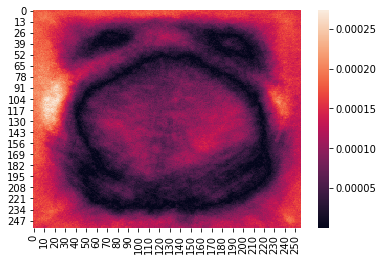

In [ ]:
# red
sns.heatmap(np.abs(model.coef_.reshape(256, 256, -1)[:, :, 0]))

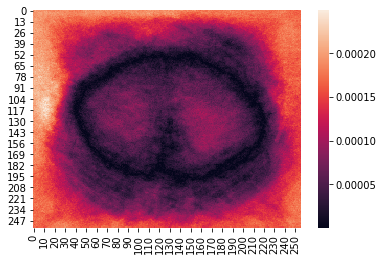

In [ ]:
# green
sns.heatmap(np.abs(model.coef_.reshape(256, 256, -1)[:, :, 1]))

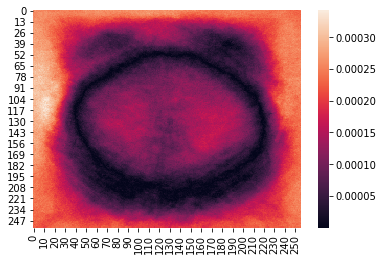

In [ ]:
# blue
sns.heatmap(np.abs(model.coef_.reshape(256, 256, -1)[:, :, 2]))

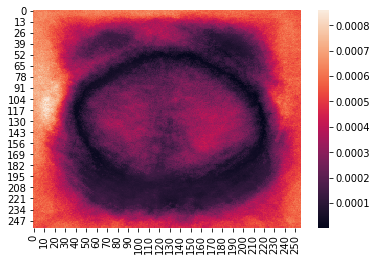

In [ ]:
# intensity?
sns.heatmap(np.abs(model.coef_).reshape(256, 256, -1).sum(-1))

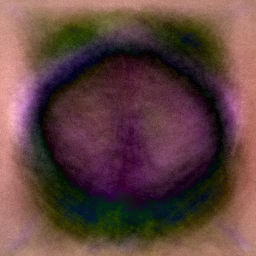

In [ ]:
color = np.abs(model.coef_).reshape(256, 256, -1)
color = color / color.max() * 255
cv2_imshow(color)

Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(x_test))

array([[188,   9],
       [ 20, 154]])